# Bayesian inference algorithm
***

A sample of $N_t$ points is drawn from the exponential PDF for the law of radioactive decay with the decay rate $\lambda$. We will then draw a sample of $N_\lambda$ assuming a uniform prior PDF and compute the likelihood for each $\lambda$. The Bayes’ theorem is then applied to calculate the posterior PDF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

## Changing $N_\lambda$ for fixed $N_t$

In [2]:
def likelihood():
    t_given_lambda =[]
    for j in lambdas:
        PPt = 1
        for i in t:
            PPt *= j*np.exp(-j*i)
        t_given_lambda.append(PPt)
    return t_given_lambda

In [3]:
Nt = 1000
true_l = 3
t = np.random.exponential(1/true_l,Nt)
posterior_lst = []
lambda_lst= []
mean_lst = []
prior_lst=[]
lambdas_lst=[]
for l in [10,100,1000]:
    Nl = l
    lambdas = np.sort(np.random.uniform(1,10,size=Nl))
    prior =np.array([1/(Nl) for i in range(Nl)])
    t_given_lambda = likelihood()
    # P(x|D)=P(D|x)P(x)/P(D)
    posterior_PDF = (t_given_lambda*prior)/np.sum(t_given_lambda*prior)
    mean_lambdas = (np.sum(lambdas*posterior_PDF))/np.sum(posterior_PDF)
    posterior_lst.append(posterior_PDF)
    lambda_lst.append(lambdas)
    mean_lst.append(mean_lambdas)
    prior_lst.append(prior)
    lambdas_lst.append(lambdas)

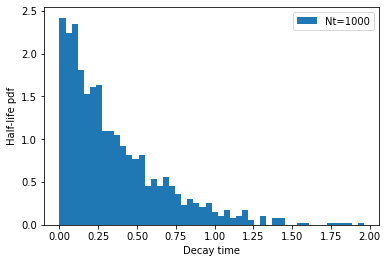

In [4]:
plt.hist(t,bins=50,label="Nt=1000",density=True) #normalize
plt.xlabel('Decay time')
plt.ylabel('Half-life pdf')
plt.legend()

In [5]:
lambdas[0]

1.0192506552711575

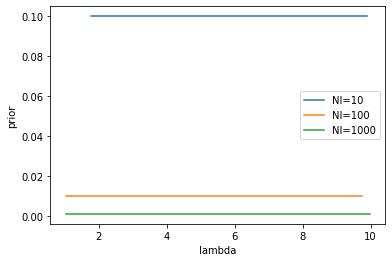

In [6]:
plt.plot(lambdas_lst[0],prior_lst[0],label="Nl=10") 
plt.plot(lambdas_lst[1],prior_lst[1],label="Nl=100")  
plt.plot(lambdas_lst[2],prior_lst[2],label="Nl=1000") 
plt.xlabel("lambda")
plt.ylabel("prior") 
plt.legend()

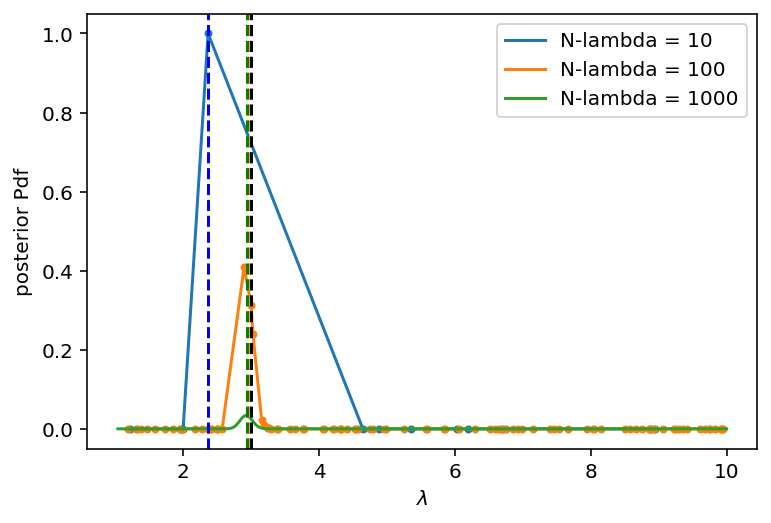

In [ ]:
plt.scatter(lambda_lst[0], posterior_lst[0], marker='.')
plt.plot(lambda_lst[0], posterior_lst[0], label="N-lambda = 10")
plt.scatter(lambda_lst[1], posterior_lst[1], marker='.')
plt.plot(lambda_lst[1], posterior_lst[1], label="N-lambda = 100")
#plt.scatter(lambda_lst[2], posterior_lst[2], marker='.')
plt.plot(lambda_lst[2], posterior_lst[2], label="N-lambda = 1000")
plt.axvline(mean_lst[0],linestyle="dashed", color='blue')
plt.axvline(mean_lst[1],linestyle="dashed", color='orange')
plt.axvline(mean_lst[2],linestyle="dashed", color='green')
plt.axvline(true_l,linestyle="dashed", color='black')
plt.xlabel('$\lambda$')
plt.ylabel('posterior Pdf')
plt.legend()

## Changing $N_t$ for fixed $N_\lambda$

In [ ]:
def likelihood_2nd():
    t_given_lambda_2nd =[] 
    for j in lambdas_2nd:
        PPt_2nd = 1
        for i in t_2nd:
            PPt_2nd *= j*np.exp(-j*i)
        t_given_lambda_2nd.append(PPt_2nd)
    return t_given_lambda_2nd

In [ ]:
Nl_2nd = 1000
posterior_lst_2nd = []
lambda_lst_2nd = []
mean_lst_2nd = []
true_l_2nd = 3
lambdas_2nd = np.sort(np.random.uniform(1,10,size= Nl_2nd))
prior_2nd =np.array([1/(Nl_2nd) for i in range(Nl_2nd)])
for t in [10,100,1000]:
    Nt_2nd = t
    t_2nd = np.random.exponential(1/true_l_2nd,Nt_2nd)
    t_given_lambda_2nd = likelihood_2nd()
    # P(x|D)=P(D|x)P(x)/P(D)
    posterior_PDF_2nd = (t_given_lambda_2nd*prior_2nd)/np.sum(t_given_lambda_2nd*prior_2nd)
    mean_lambdas_2nd = (np.sum(lambdas_2nd*posterior_PDF_2nd))/np.sum(posterior_PDF_2nd)
    posterior_lst_2nd.append(posterior_PDF_2nd)
    lambda_lst_2nd.append(lambdas_2nd)
    mean_lst_2nd.append(mean_lambdas_2nd)

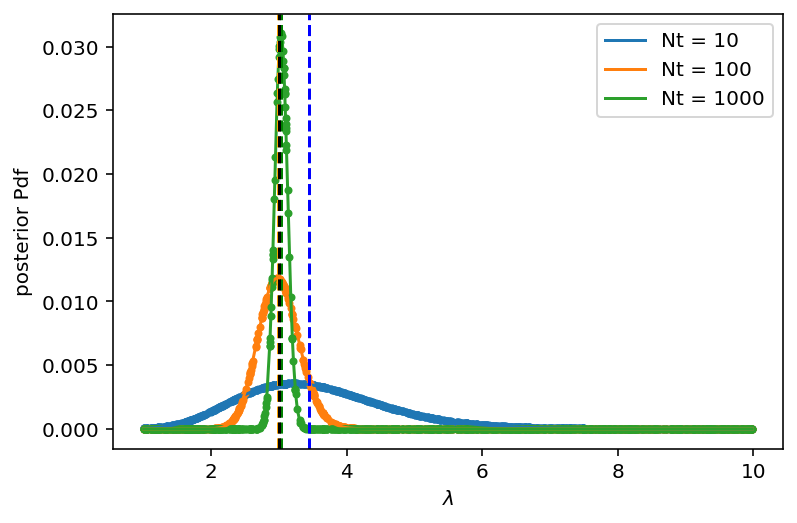

In [ ]:
plt.scatter(lambda_lst_2nd[0], posterior_lst_2nd[0], marker='.')
plt.plot(lambda_lst_2nd[0], posterior_lst_2nd[0], label="Nt = 10")
plt.scatter(lambda_lst_2nd[1], posterior_lst_2nd[1], marker='.')
plt.plot(lambda_lst_2nd[1], posterior_lst_2nd[1], label="Nt = 100")
plt.scatter(lambda_lst_2nd[2], posterior_lst_2nd[2], marker='.')
plt.plot(lambda_lst_2nd[2], posterior_lst_2nd[2], label="Nt = 1000")
plt.axvline(mean_lst_2nd[0],linestyle="dashed", color='blue')
plt.axvline(mean_lst_2nd[1],linestyle="dashed", color='orange')
plt.axvline(mean_lst_2nd[2],linestyle="dashed", color='green')
plt.axvline(true_l_2nd,linestyle="dashed", color='black')
plt.xlabel('$\lambda$')
plt.ylabel('posterior Pdf')
plt.legend()

***